In [1]:
############# Importing libraries ##############
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
############ Loading dataset ##################
Data=pd.read_csv("loan.csv")
Data.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\2266108652.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  Data=pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Shape of Dataframe
Data.shape

(39717, 111)

In [4]:
#Checking missing values
Data.isnull().sum() 

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

# Data Cleaning
## 1. Dropping columns that have missing values more than 90%

In [5]:
########### Data cleaning ####################
# Dropping columns that have all null values
Data.drop(Data.columns[(Data.isnull().sum()/Data.shape[0])*100 > 90],axis = 1,inplace=True)

In [6]:
Data.loc[0]

id                                                                      1077501
member_id                                                               1296599
loan_amnt                                                                  5000
funded_amnt                                                                5000
funded_amnt_inv                                                          4975.0
term                                                                  36 months
int_rate                                                                 10.65%
installment                                                              162.87
grade                                                                         B
sub_grade                                                                    B2
emp_title                                                                   NaN
emp_length                                                            10+ years
home_ownership                          

In [7]:
Data["funded_amnt"].value_counts()

funded_amnt
10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
26250       1
24725       1
31750       1
22625       1
22350       1
Name: count, Length: 1041, dtype: int64

## 2. Dropping irrelevant data variables
### Aim: To understand the variables which are strong indicators of default. 

The aim of this study is to analyse variables which are strong indicators of default hence we use user details and the driving factors for loan defaulting before approving the loan.

-Based on the aim we remove variable what are not usefull for the analysis.

### List of variable with single value
#### Followng variable have single value hence removing them.
- id
- member_id
- url
- desc
- title
- zip_code
- policy_code
- application_type
- tax_liens
- delinq_amnt
- chargeoff_within_12_mths
- acc_now_delinq
- collections_12_mths_ex_med
- initial_list_status
- pymnt_plan

### List of variable which are not usefull for the analysis
- out_prncp_inv and total_pymnt_inv are not usefull to the loan default analysis.
- funded_amnt and funded_amnt_inv gives same info hence removing.

#### Following are some variable that are post-approval features. Hence removing them.
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record



In [8]:
# Dropping columns that have single value.
extra_columns=["id","member_id","url","desc","title","zip_code","policy_code","application_type","tax_liens","delinq_amnt","chargeoff_within_12_mths","acc_now_delinq","collections_12_mths_ex_med","initial_list_status","pymnt_plan","out_prncp_inv","total_pymnt_inv","delinq_2yrs","revol_bal","out_prncp","total_pymnt","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","chargeoff_within_12_mths","mths_since_last_delinq","funded_amnt_inv"]
Data.drop(extra_columns,axis = 1,inplace=True)

In [9]:
Data.shape

(39717, 25)

## 3. Dropping rows that are duplicated 

In [10]:
# Checking rows that have all null values
Data[Data.isnull().all(axis=1)] #not found any row with all null values

# Checking duplicates
Data[Data.duplicated()] #not duplicates found


,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies


## 4. Changing Data type 

In [11]:
#Changing data type
Data["int_rate"]=Data["int_rate"].apply(lambda x:pd.to_numeric(x.split('%')[0]))
Data['revol_util']=pd.to_numeric(Data['revol_util'].str.split("%",expand=True)[0])

In [12]:
Data.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

## 5. Removing Outliers

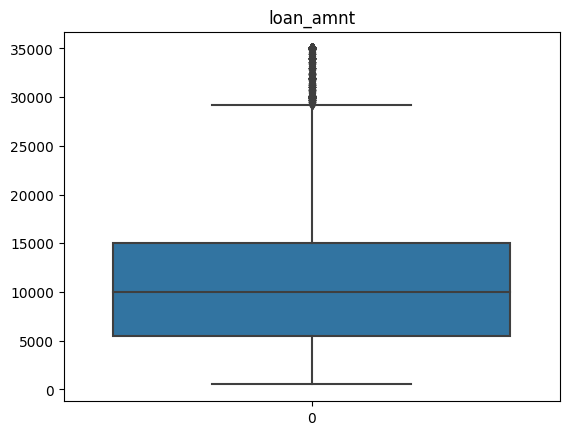

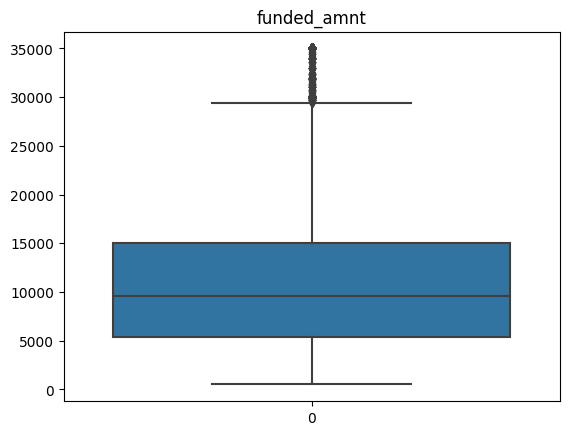

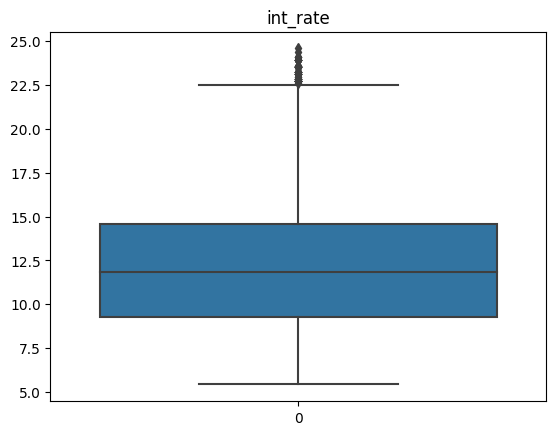

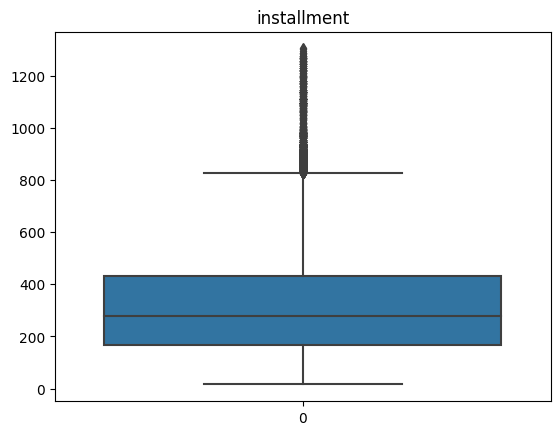

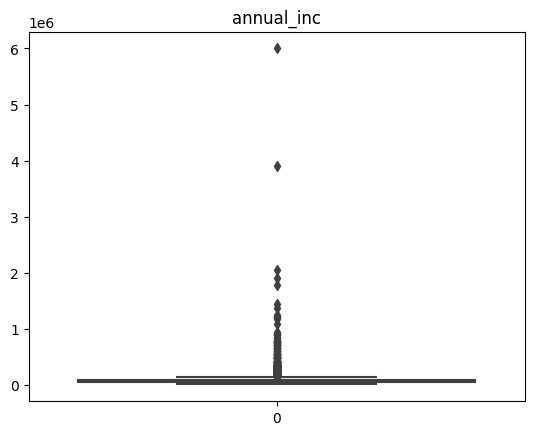

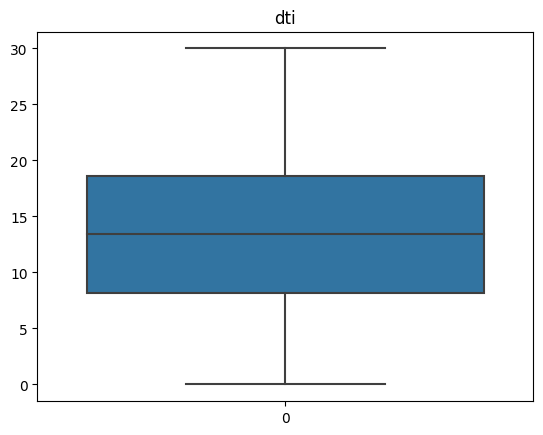

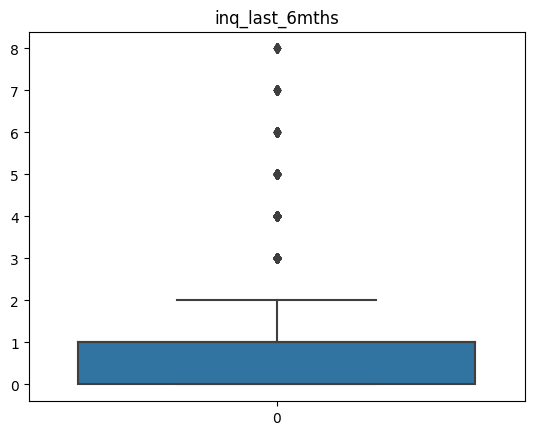

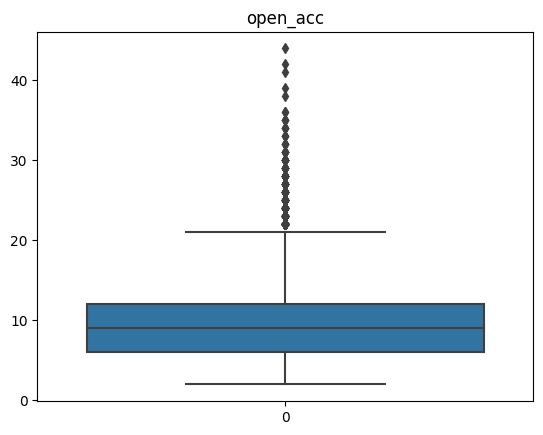

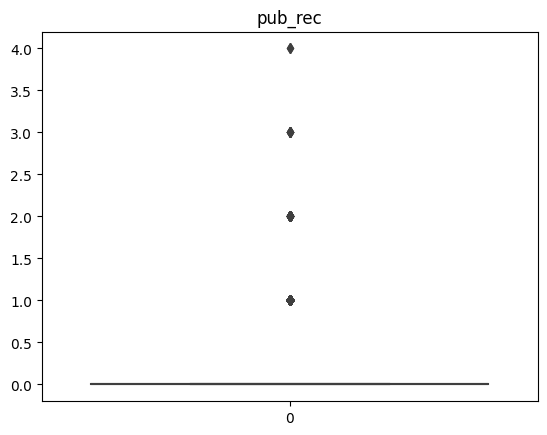

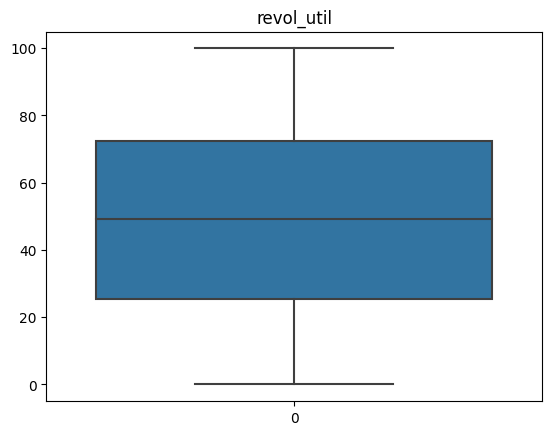

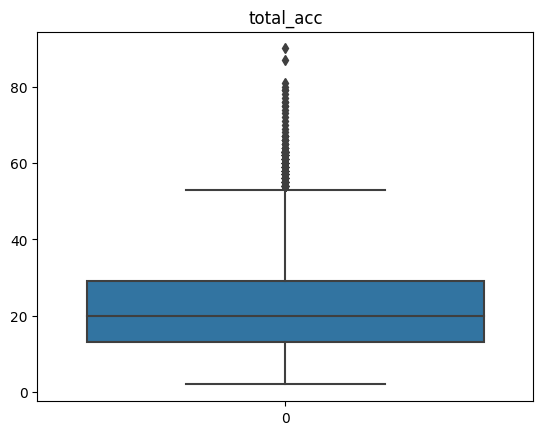

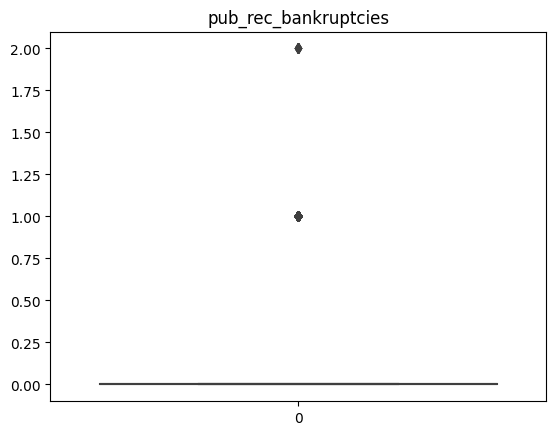

In [13]:
#Plot for Outlier
Data_numeric= Data[Data.describe().columns]
for i in Data_numeric.columns:
    plt.figure()
    sns.boxplot(Data_numeric[i]).set(title=i)

In [14]:
#Removing outliers for numeric features
def drop_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return not_outliers

#Calling
Data_removed_outlier=drop_outliers_IQR(Data_numeric)

#Concat
Data_categoric=Data[["term","grade","sub_grade","emp_title","emp_length","home_ownership","verification_status","issue_d","loan_status","purpose","addr_state","earliest_cr_line","last_credit_pull_d"]]
Data_removed_outlier=pd.concat([Data_removed_outlier,Data_categoric],axis=1)

# Data Manipulation

## 1. Converting numerical data to categorical

In [15]:
Data_removed_outlier=Data_removed_outlier[~Data_removed_outlier["emp_length"].isnull()]
Data_removed_outlier['emp_length']=Data_removed_outlier['emp_length'].str.extract('(\d+)')
Data_removed_outlier['emp_length']=Data_removed_outlier["emp_length"].astype(int)


In [16]:
Data_removed_outlier.loc[0]

loan_amnt                    5000.0
funded_amnt                  5000.0
int_rate                      10.65
installment                  162.87
annual_inc                  24000.0
dti                           27.65
inq_last_6mths                  1.0
open_acc                        3.0
pub_rec                         0.0
revol_util                     83.7
total_acc                       9.0
pub_rec_bankruptcies            0.0
term                      36 months
grade                             B
sub_grade                        B2
emp_title                       NaN
emp_length                       10
home_ownership                 RENT
verification_status        Verified
issue_d                      Dec-11
loan_status              Fully Paid
purpose                 credit_card
addr_state                       AZ
earliest_cr_line             Jan-85
last_credit_pull_d           May-16
Name: 0, dtype: object

## 2. Converting categorical data to numeric

In [17]:
# Function
def loan_amt(df):
    if df <10000:
        return "low"
    elif df >=10000 and df <20000:
        return "medium"
    elif df >=20000 and df <30000:
        return "high"
    else:
        return "very_high"

#Calling
Data_removed_outlier["loan_amnt_cat"]=Data_removed_outlier["loan_amnt"].apply(lambda x:loan_amt(x))

## 3. Data-Driven Matrix 

In [18]:
#Issue Date manipulation/Type Derived Data
Data_removed_outlier["Issue_Month"]=Data_removed_outlier["issue_d"].str.split("-",expand=True)[0]
Data_removed_outlier["Issue_Year"]=Data_removed_outlier["issue_d"].str.split("-",expand=True)[1]

# Data Analysis

In [19]:
#Subsetting data based on loan status
#Considering only closed cases.
df=Data_removed_outlier[Data_removed_outlier["loan_status"]!="Current"]

In [20]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
       'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'term', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line',
       'last_credit_pull_d', 'loan_amnt_cat', 'Issue_Month', 'Issue_Year'],
      dtype='object')

In [21]:
df.loc[0]

loan_amnt                    5000.0
funded_amnt                  5000.0
int_rate                      10.65
installment                  162.87
annual_inc                  24000.0
dti                           27.65
inq_last_6mths                  1.0
open_acc                        3.0
pub_rec                         0.0
revol_util                     83.7
total_acc                       9.0
pub_rec_bankruptcies            0.0
term                      36 months
grade                             B
sub_grade                        B2
emp_title                       NaN
emp_length                       10
home_ownership                 RENT
verification_status        Verified
issue_d                      Dec-11
loan_status              Fully Paid
purpose                 credit_card
addr_state                       AZ
earliest_cr_line             Jan-85
last_credit_pull_d           May-16
loan_amnt_cat                   low
Issue_Month                     Dec
Issue_Year                  

## 1. Univaraite Analysis 

### 1. Analysing Categorical Variables

### 1.1 Analysing Loan Status

<Axes: xlabel='loan_status', ylabel='count'>

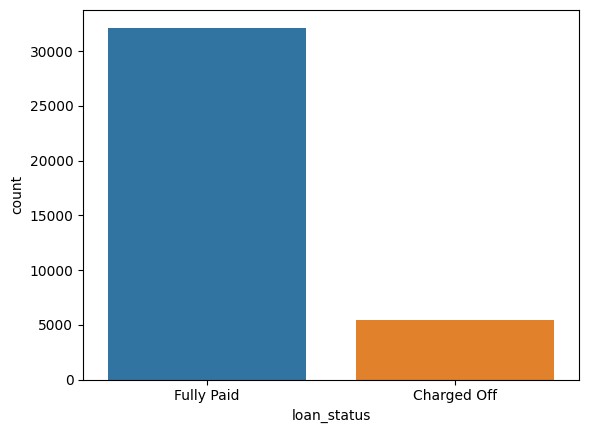

In [22]:
sns.countplot(x='loan_status',data=df)

### Conclusion for 1.1:  We observed that in our dataset we have data points for fully paid status in majority than charged off cases 

## Segmented Univariate Analysis
### 1.2 Grade 

C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\3118223027.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


[Text(0.5, 1.0, 'Charged Off')]

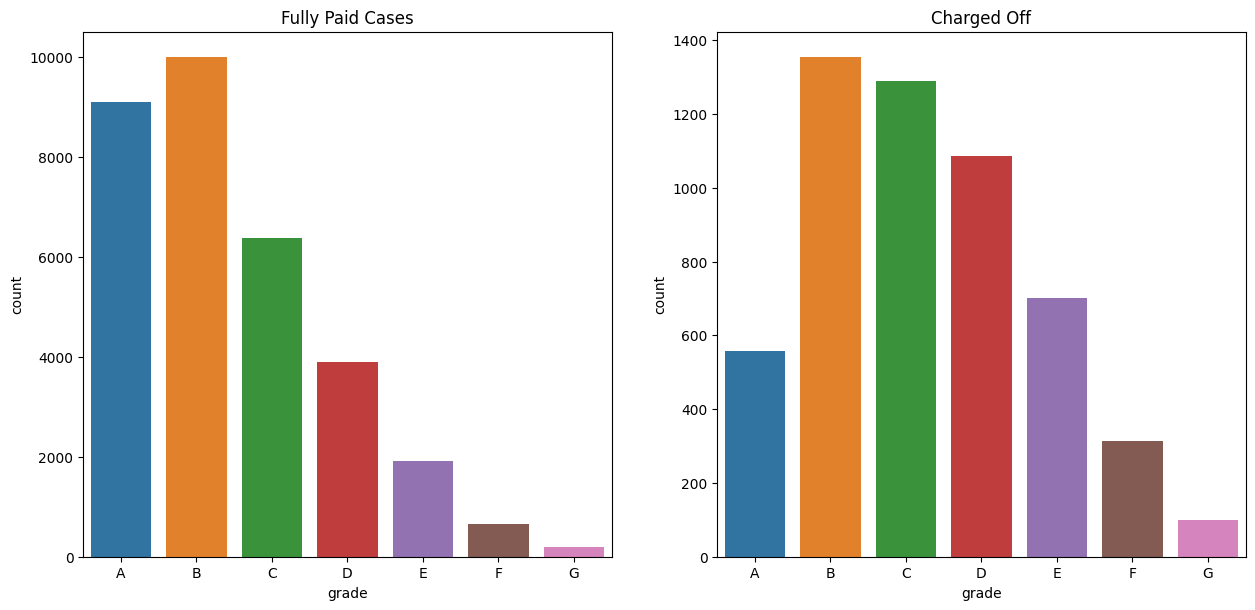

In [23]:
fig, ax = plt.subplots(figsize = (15,15))
plt.subplot(221)
sns.countplot(x='grade',data=df[df.loan_status=='Fully Paid'],order=['A', 'B', 'C', 'D', 'E', 'F', 'G']).set(
    title="Fully Paid Cases")
plt.subplot(222)
sns.countplot(x='grade',data=df[df.loan_status=='Charged Off'],order=['A', 'B', 'C', 'D', 'E', 'F', 'G']).set(
    title="Charged Off")

### Conclusion for 1.2: Here we can see that people with good grade have more tendency to repay the loan but it is not completely exclusive

### 1.3 Term

C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\1930752368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=["term"],inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\1930752368.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


[Text(0.5, 1.0, 'Charged Off')]

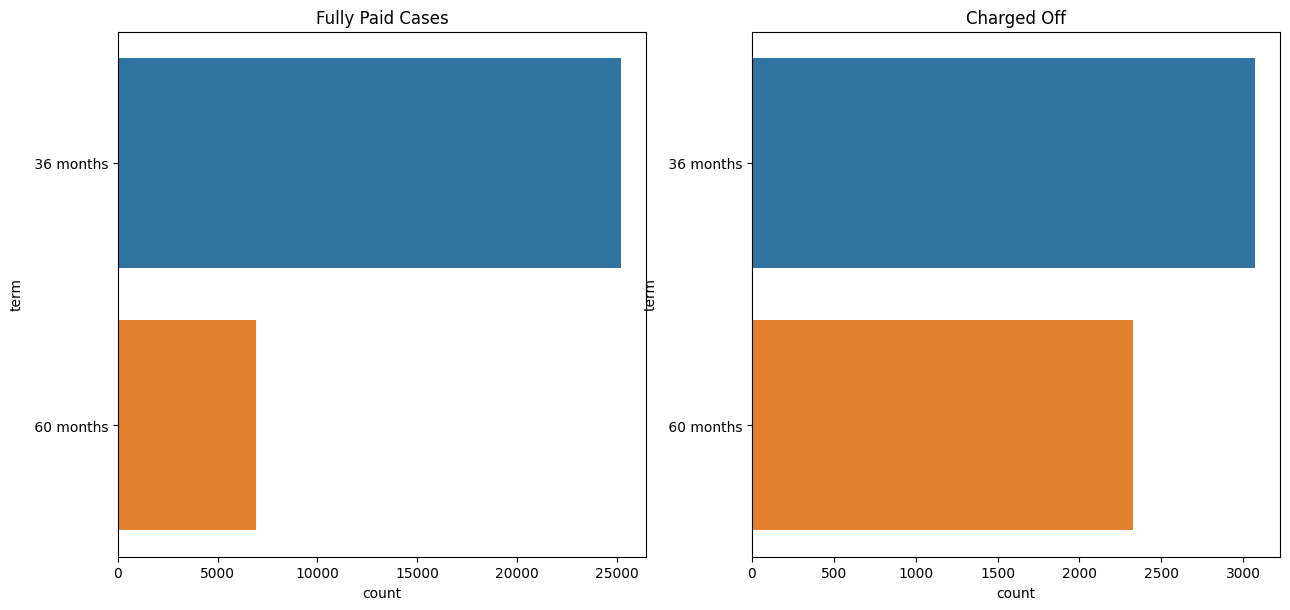

In [24]:
fig, ax = plt.subplots(figsize = (15,15))
df.sort_values(by=["term"],inplace=True)
plt.subplot(221)
sns.countplot(y="term",data=df[df['loan_status']=='Fully Paid']).set(title="Fully Paid Cases")
plt.subplot(222)
sns.countplot(y="term",data=df[df['loan_status']=='Charged Off']).set(title="Charged Off")

### Conclusion for 1.3 : Long term(60months) seems to be more prevalent in Charged off or Defaulter category

### 1.4 Home_ownership

C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\212711682.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


[Text(0.5, 1.0, 'Charged Off')]

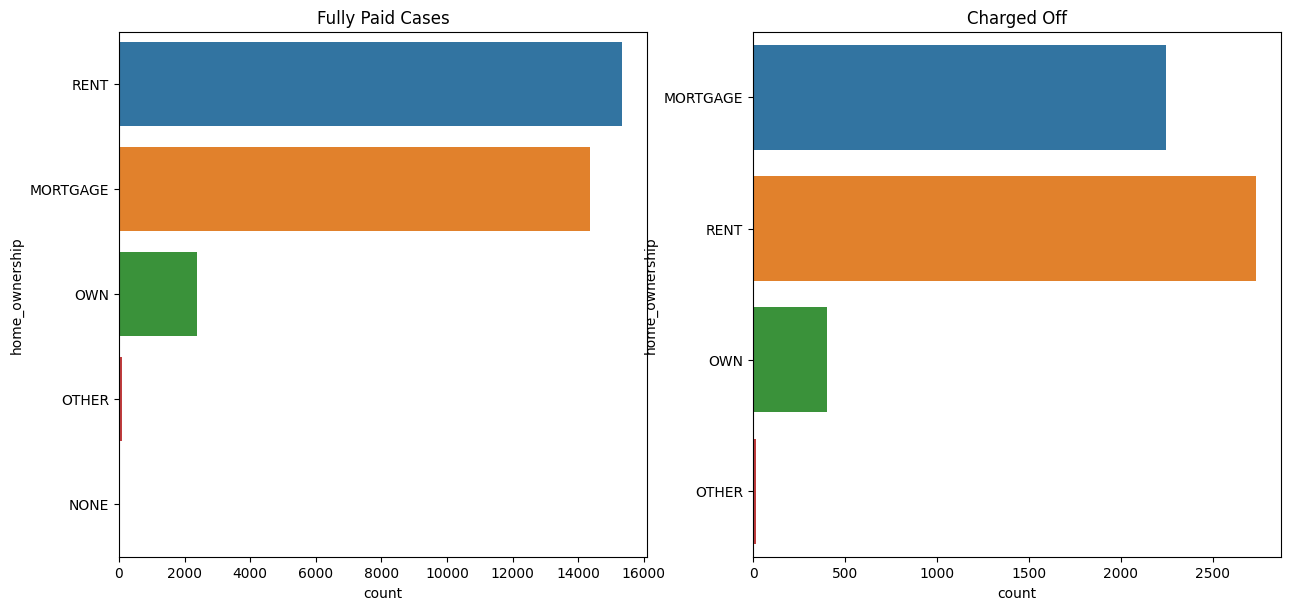

In [25]:
fig, ax = plt.subplots(figsize = (15,15))
plt.subplot(221)
sns.countplot(y="home_ownership",data=df[df['loan_status']=='Fully Paid']).set(title="Fully Paid Cases")
plt.subplot(222)
sns.countplot(y="home_ownership",data=df[df['loan_status']=='Charged Off']).set(title="Charged Off")

### Conclusion for 1.4: Effect of home_ownership is almost same for type of loan status

### 1.5 Address_status

C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\3110310470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=["addr_state"],inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\3110310470.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


[Text(0.5, 1.0, 'Charged Off')]

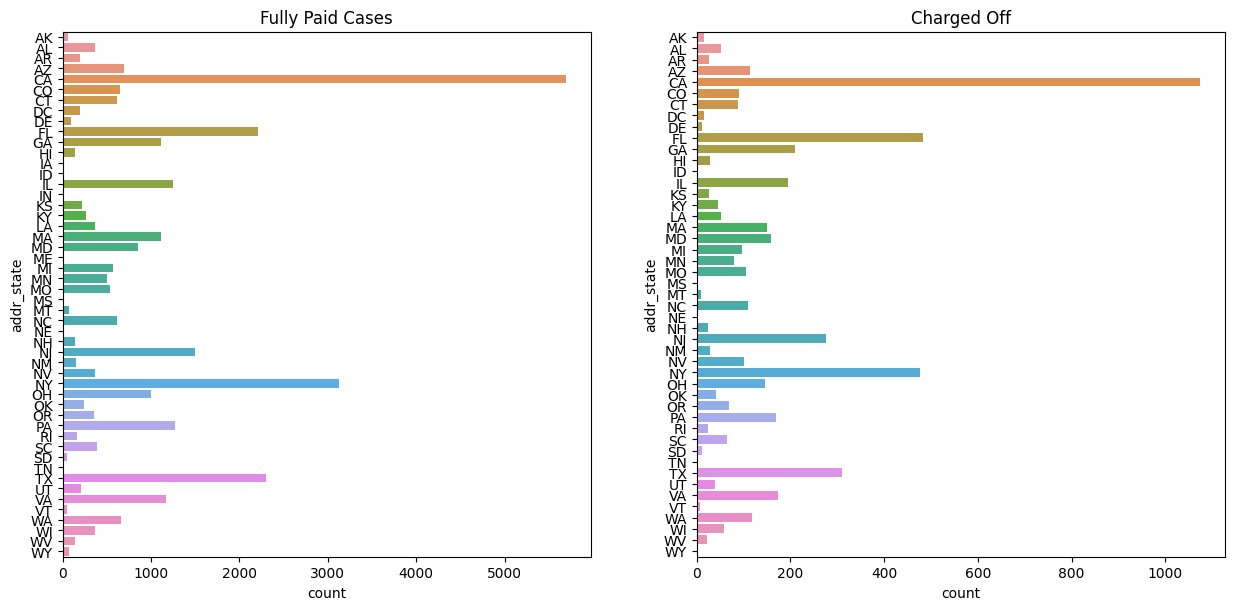

In [26]:
fig, ax = plt.subplots(figsize = (15,15))
df.sort_values(by=["addr_state"],inplace=True)
plt.subplot(221)
sns.countplot(y="addr_state",data=df[df['loan_status']=='Fully Paid']).set(title="Fully Paid Cases")
plt.subplot(222)
sns.countplot(y="addr_state",data=df[df['loan_status']=='Charged Off']).set(title="Charged Off")

### Conclusion for 1.5 : Effect of addr_state is almost same for type of loan status

### 1.6 Issue_Month


C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\2962718892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=["Issue_Month"],inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\2962718892.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


[Text(0.5, 1.0, 'Charged Off')]

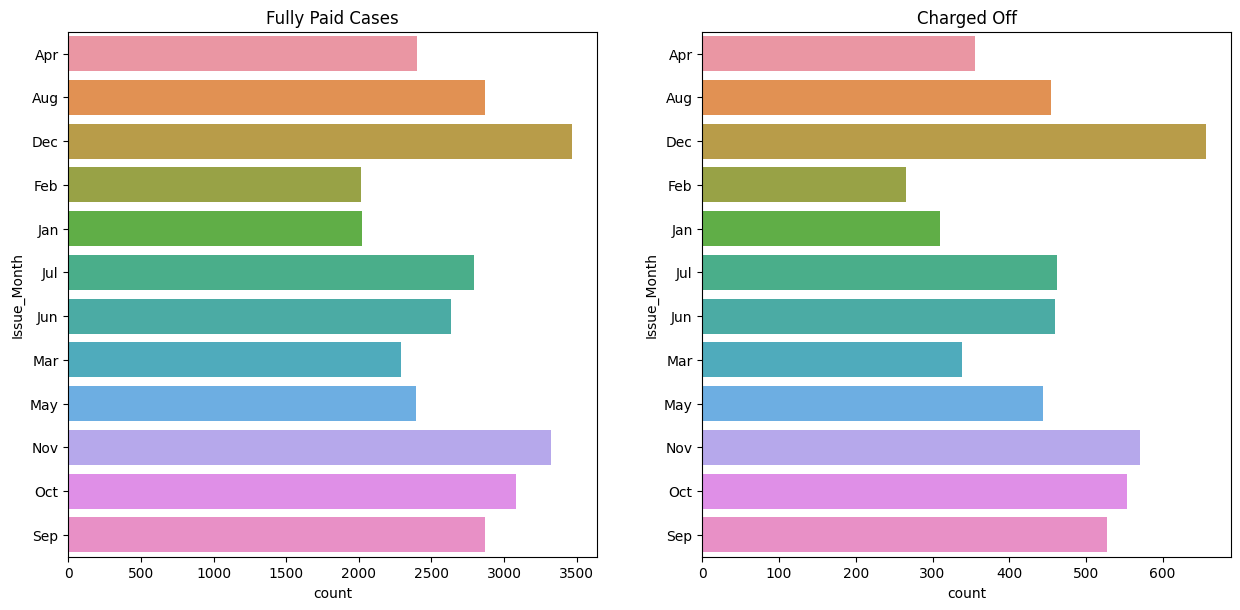

In [27]:
fig, ax = plt.subplots(figsize = (15,15))
df.sort_values(by=["Issue_Month"],inplace=True)
plt.subplot(221)
sns.countplot(y="Issue_Month",data=df[df['loan_status']=='Fully Paid']).set(title="Fully Paid Cases")
plt.subplot(222)
sns.countplot(y="Issue_Month",data=df[df['loan_status']=='Charged Off']).set(title="Charged Off")

### Conclusion for 1.6 : Effect of month is almost same for type of loan status.

C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\3147876147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=["Issue_Year"],inplace=True)


<Axes: xlabel='Issue_Year', ylabel='loan_amnt'>

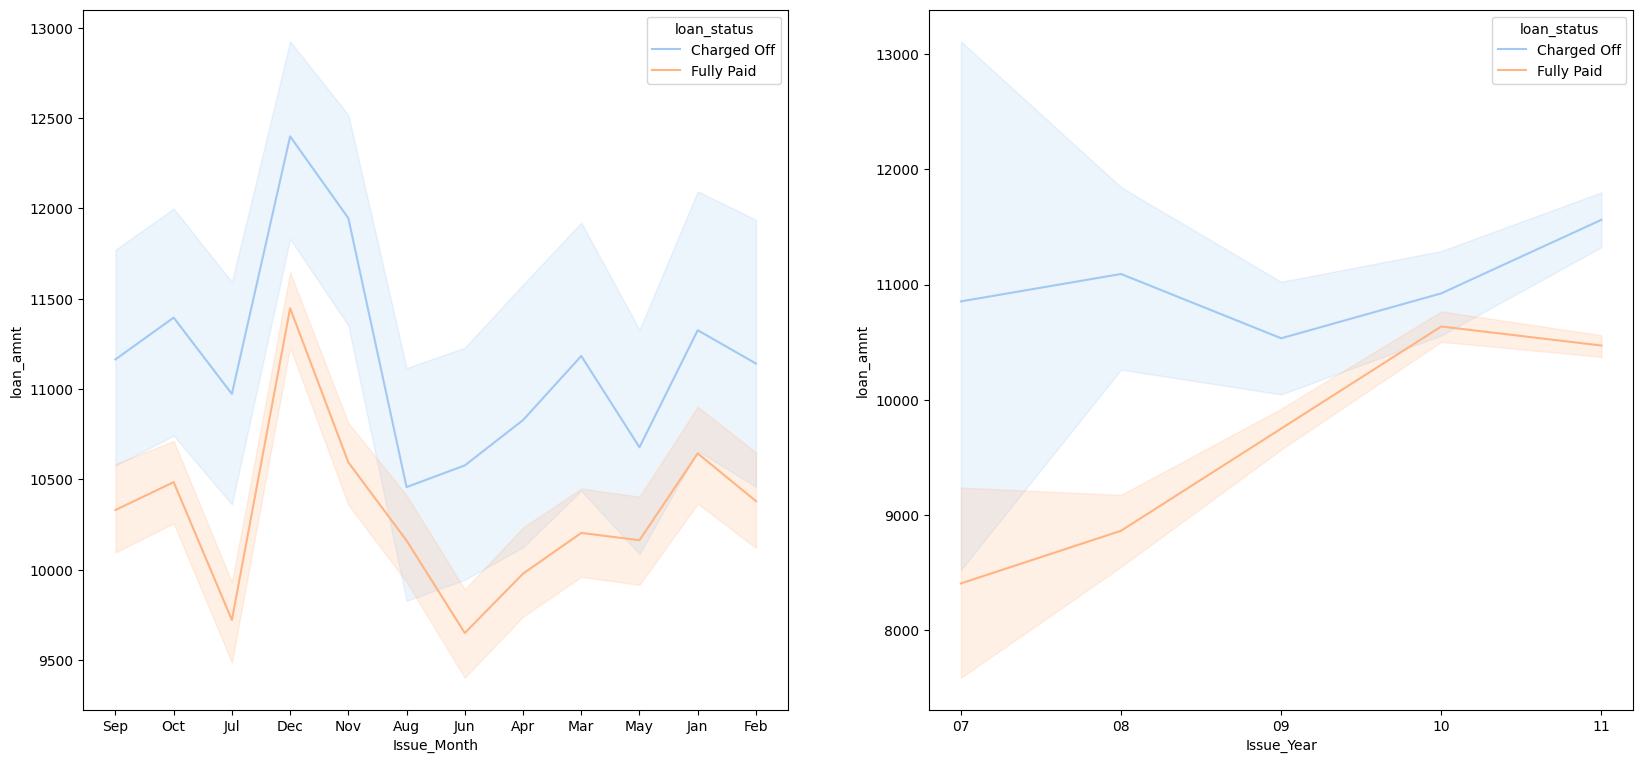

In [28]:
plt.figure(figsize=(20,20))
df.sort_values(by=["Issue_Year"],inplace=True)
plt.subplot(221)
sns.lineplot(data=df,y='loan_amnt',x='Issue_Month',hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data=df,y='loan_amnt',x='Issue_Year',hue ='loan_status',palette="pastel")


### Conclusion for 1.6 : Effect of Issue_Month is almost same for type of loan status. In from 2010-2011 we see a drastic number of increase in defaulter v/s paid

### 1.7 Loan_Amount

C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\2925972447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=["loan_amnt_cat"],inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\2925972447.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(221)


[Text(0.5, 1.0, 'Charged Off')]

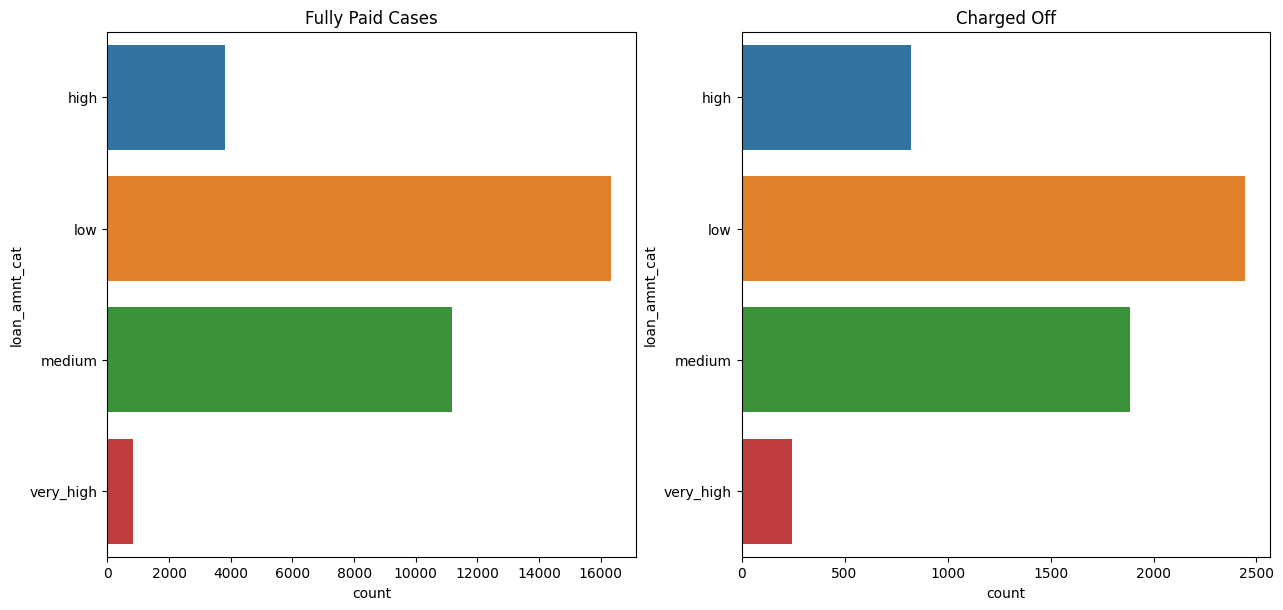

In [29]:
fig, ax = plt.subplots(figsize = (15,15))
df.sort_values(by=["loan_amnt_cat"],inplace=True)
plt.subplot(221)
sns.countplot(y="loan_amnt_cat",data=df[df['loan_status']=='Fully Paid']).set(title="Fully Paid Cases")
plt.subplot(222)
sns.countplot(y="loan_amnt_cat",data=df[df['loan_status']=='Charged Off']).set(title="Charged Off")

### Conclusion for 1.7: Here we see loan_amnt is more likely to be high or very high for default cased than low and medium when compared with fully paid cases

## 2. Bivaraite Analysis 

Here we analyse numeric and categoric features

### 2.1 Loan status with numeric features using loop

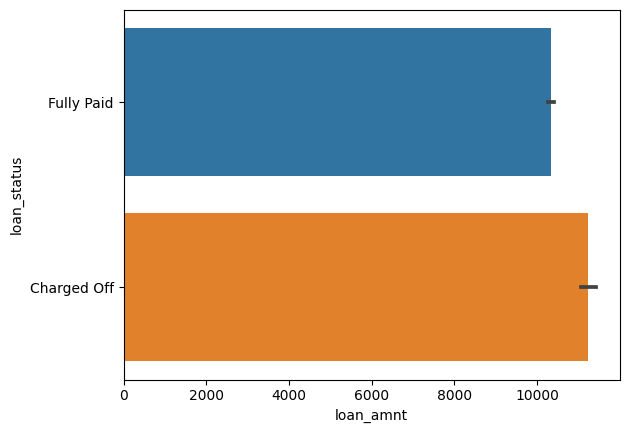

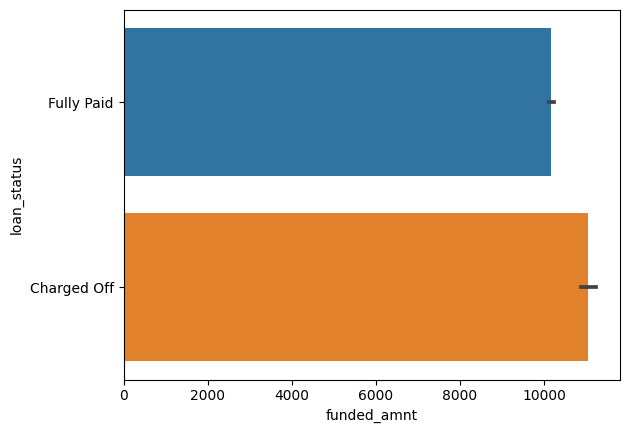

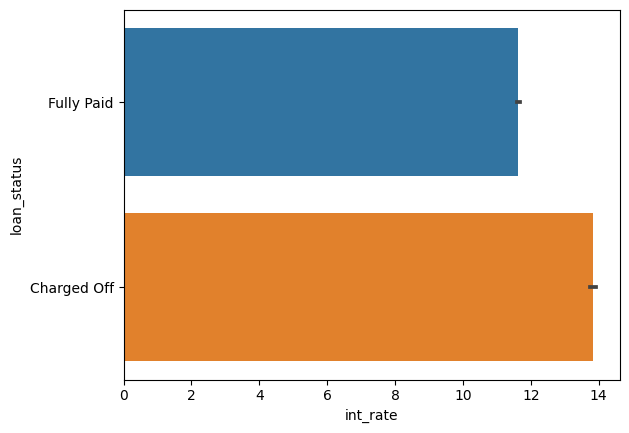

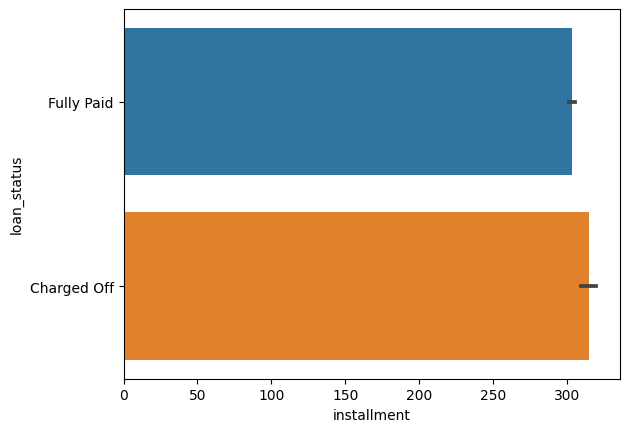

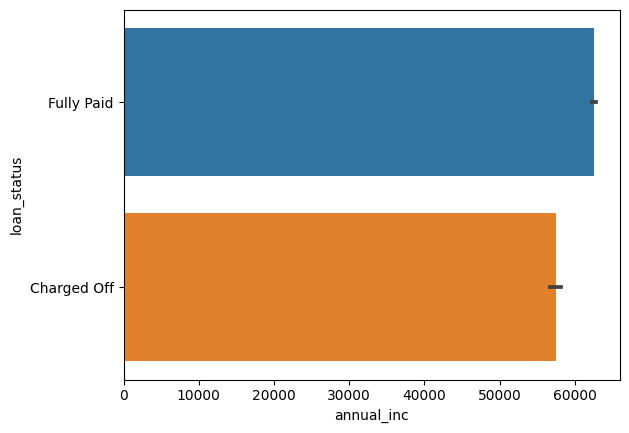

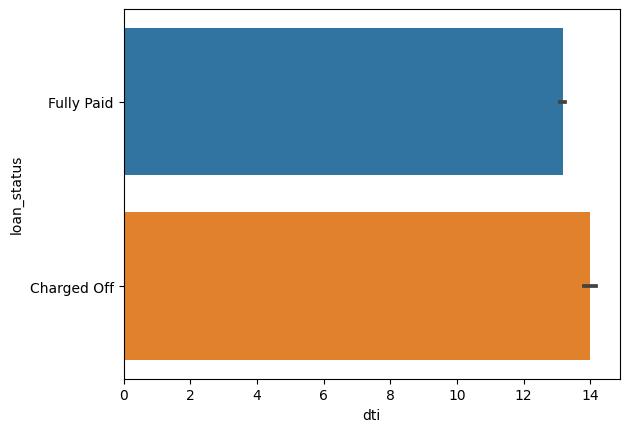

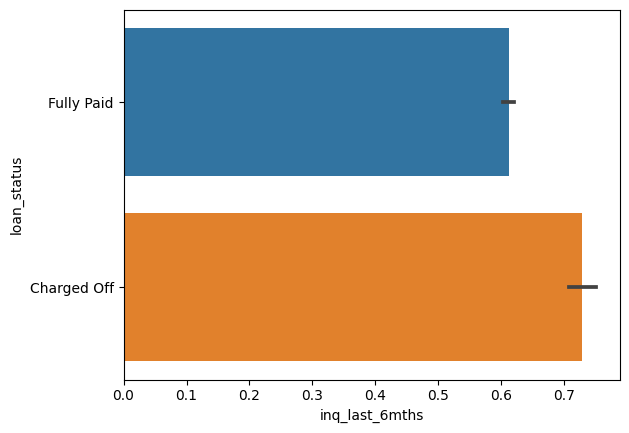

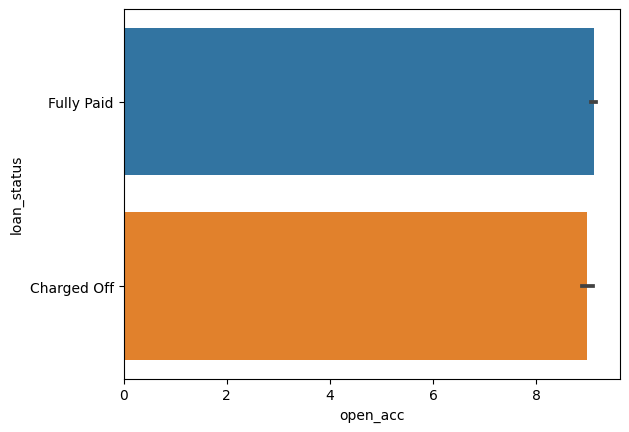

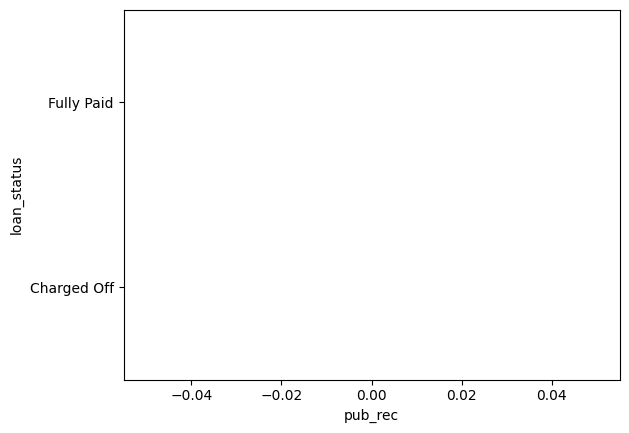

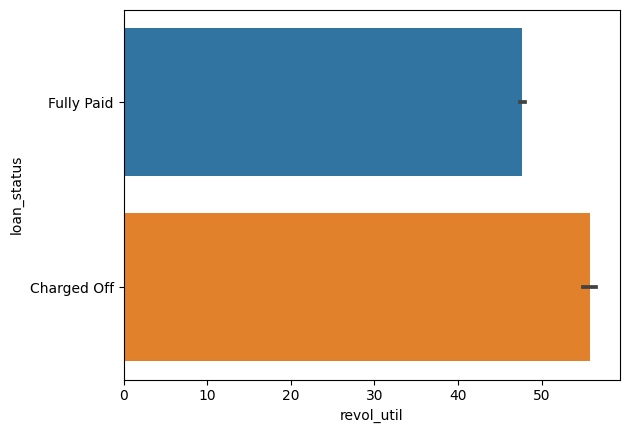

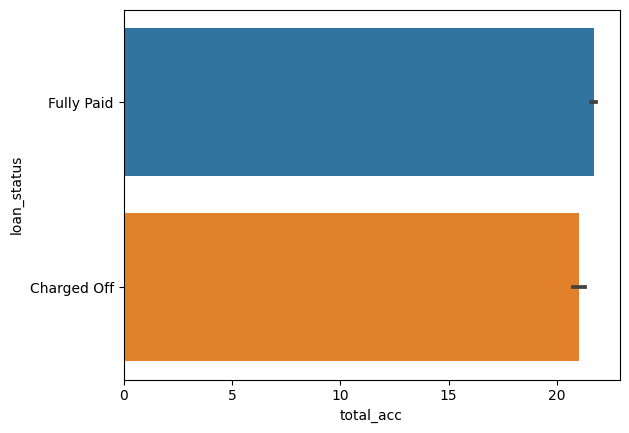

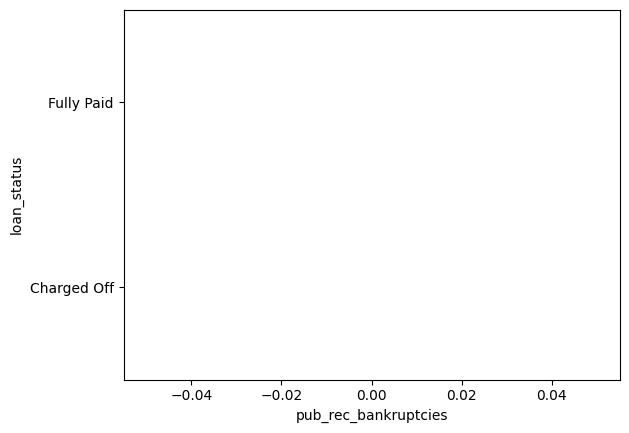

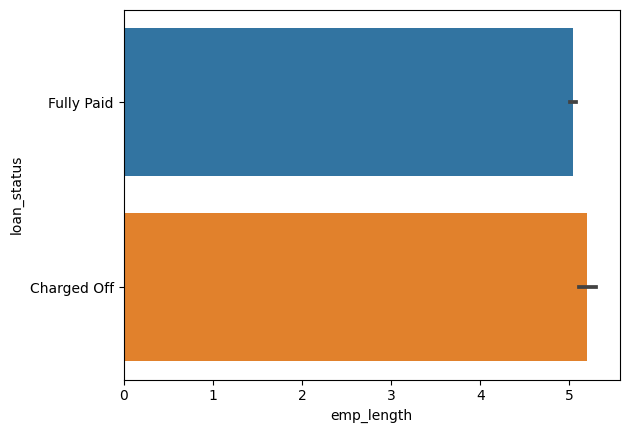

In [30]:
####### Here we compare first loan status with numeric features ##########
for i in df.describe().columns:
    plt.figure() 
    sns.barplot(x=df[i],y=df["loan_status"],data=df)

<Axes: xlabel='annual_inc', ylabel='loan_status'>

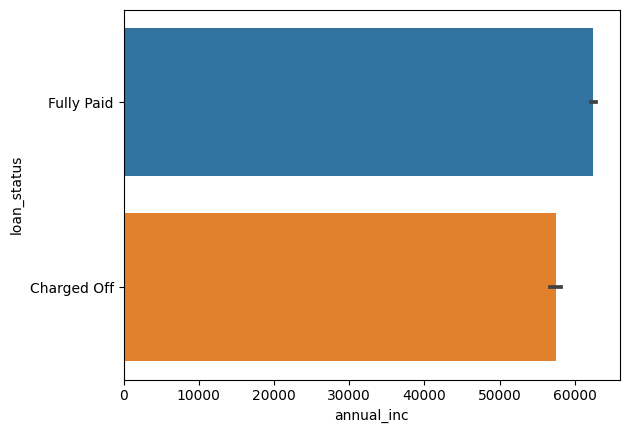

In [31]:
sns.barplot(x=df["annual_inc"],y=df["loan_status"],data=df)

### Conclusion for 2.1
Out of all numeric features these are the ones that are more useful in determing the loan_status
-loan_amnt,funded_amnt,int_rate,annual_inc,inq_last_6mths,revol_util,dti


### 2.2 Checking interdependence of numerical variable on each other through correlation


In [32]:
df_corr=df[df.describe().columns]
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,emp_length
loan_amnt,1.000000,0.980762,0.248718,0.923744,0.368576,0.069361,-0.004171,0.180251,nan,0.067769,0.242504,nan,0.134834
funded_amnt,0.980762,1.000000,0.264847,0.952578,0.368153,0.068027,-0.003867,0.176676,nan,0.072699,0.237502,nan,0.137832
int_rate,0.248718,0.264847,1.000000,0.230569,0.045820,0.111466,0.156679,-0.041129,nan,0.464051,-0.064334,nan,-0.000314
installment,0.923744,0.952578,0.230569,1.000000,0.356785,0.055091,-0.004140,0.167215,nan,0.081035,0.214757,nan,0.117138
annual_inc,0.368576,0.368153,0.045820,0.356785,1.000000,-0.079448,0.016279,0.266597,nan,0.043072,0.386733,nan,0.192371
dti,0.069361,0.068027,0.111466,0.055091,-0.079448,1.000000,0.016399,0.294638,nan,0.279130,0.231724,nan,0.048619
inq_last_6mths,-0.004171,-0.003867,0.156679,-0.004140,0.016279,0.016399,1.000000,0.080729,nan,-0.019540,0.079808,nan,-0.000134
open_acc,0.180251,0.176676,-0.041129,0.167215,0.266597,0.294638,0.080729,1.000000,nan,-0.082305,0.664452,nan,0.101340
pub_rec,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
revol_util,0.067769,0.072699,0.464051,0.081035,0.043072,0.279130,-0.019540,-0.082305,nan,1.000000,-0.062715,nan,0.010300


### Conclusion for 2.2: loan_amnt is highly correlated with "installment","funded_amnt". Hence only consider of loan_amnt is enough

### 2.3 Loan status as numeric features along with Categoric feature


C:\Users\DELL\AppData\Local\Temp\ipykernel_20036\1769758401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status_numeric"]=df["loan_status"].apply(lambda x:0 if x=="Fully Paid" else 1)


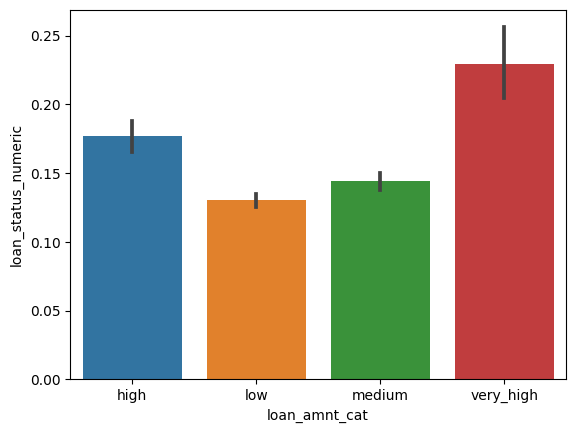

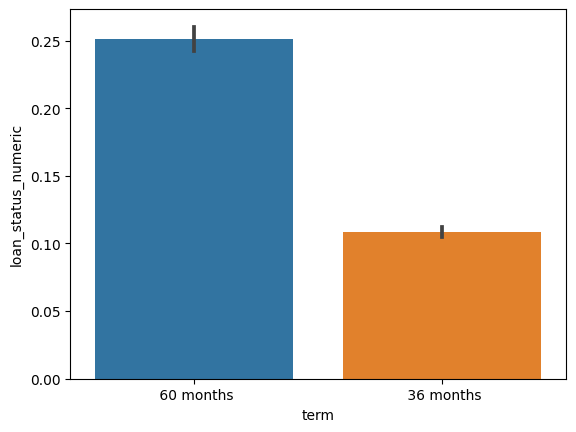

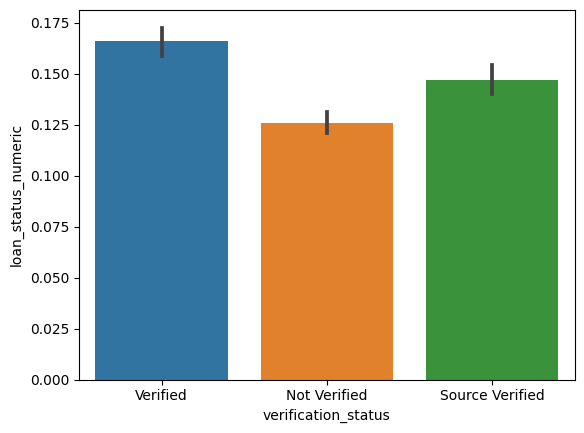

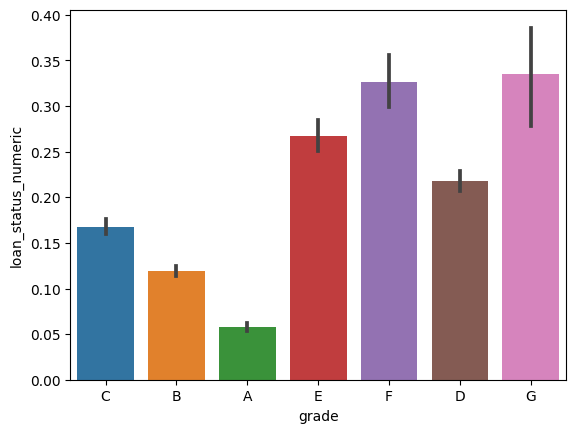

In [33]:
####### Here we compare first categoric features with loan status ##########
df["loan_status_numeric"]=df["loan_status"].apply(lambda x:0 if x=="Fully Paid" else 1)
cat_col=["loan_amnt_cat","term","verification_status","grade"]
for i in cat_col:
    plt.figure() 
    sns.barplot(x=df[i],y=df["loan_status_numeric"],data=df)

<Axes: xlabel='verification_status', ylabel='loan_status_numeric'>

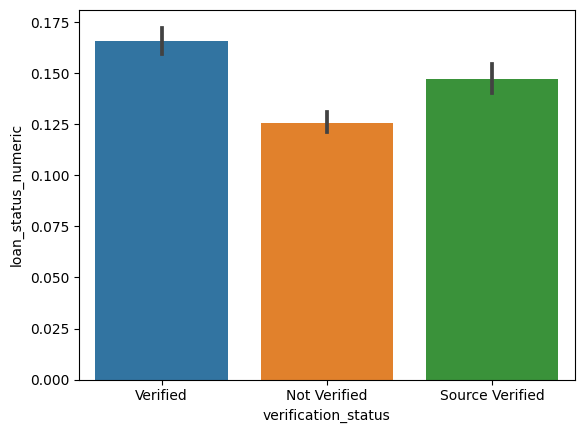

In [34]:
sns.barplot(x=df['verification_status'],y=df["loan_status_numeric"],data=df)

### Conclusion for 2.3
- The higher the loan amount the risker it will become towards default status.
- Longer term loan seems to get more defaulter than short term. 
- Verification is directly affecting the loan status outcome. i.e the more verified a person details is the lesser the chances of him to become a defaulter.
- Values of loan status will vary from paid to defaulter if laon grades goes from A to G. Hence higher the grade the safer the outcome.


# Result of Our Analysis

### Drivers for portfolio assement/risk assessment
- Loan Grade
  - Findings: People with good loan grades have more tendency to repay the loan.

- Term 
  - Findings: Long term(60months) seems to be more prevalent in Charged off or Defaulter category than paid ones. Hence if bank provide loans for shorter term than that would be more safe in term of bussiness prespective.

- Loan Amount
  - Findings: Loan amount is more likely to be high or very high for default cases as compare with fully paid cases. Hence lower the amount lower the risk.

- Verification
  - Findings: Verification is directly affecting the loan status outcome. i.e the more verified a person details is the lesser the chances of him to become a defaulter.

- Interest Rate
  - Findings: High interest rate seems to be risk factor as most defaulter has high interest rate trend as compare to fully paid cases. Hence if some one is going for high interest other drivers like verification status,Loan Grade,loan amount, Loan term should be considered very carefully.

- Annual Income
  - Finding: The higher the safer the candidate is.




### Driver for Business Expandation 
- Issue_Month
  - Findings: Higher loan applications are seen in December month for every year in the dataset. Hence it can be used as a oppurtunity by bank to grow their customer by giving schemes or doing marketing campaigns.
